In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,SelectPercentile,SequentialFeatureSelector,RFE,RFECV,SelectFromModel
from sklearn import feature_selection
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
wine = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#checking for null values
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#no null values, checking for duplicate rows
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [5]:
#240 duplicate rows, lets drop them
wine.drop_duplicates(inplace=True)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

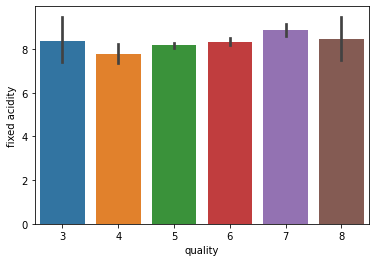

In [7]:
#duplicate rows have been dropped
#lets plot response variable by predictors

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

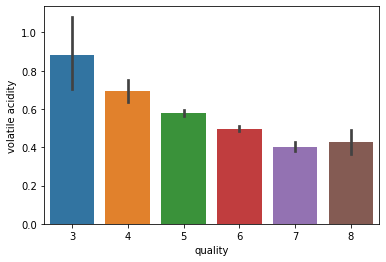

In [8]:
#it seems no relation between quality and fixed acidity
#high variance in quality = 3 & 8 and low variance in the middle

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [9]:
#by decreasing volatile acidity we see a increasing pattern in quality
#high variance in quality = 3

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

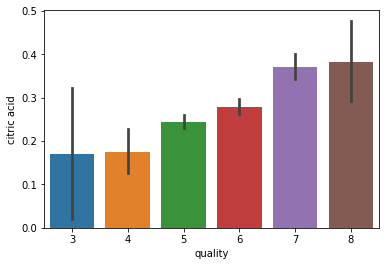

In [10]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

In [11]:
#increasing quality by increasing citric acid
#high variance in quality = 3, 8

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

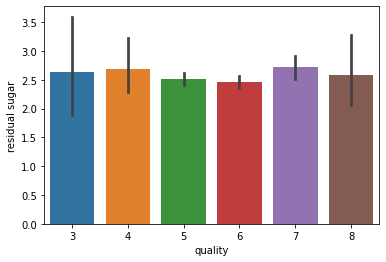

In [12]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

In [13]:
#it seems no relation between residual sugar and fixed acidity
#high variance in quality = 3, 4, 8 and low variance in the middle

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

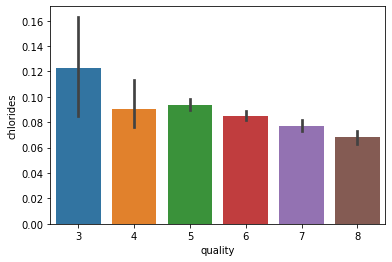

In [14]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

In [15]:
#by decreasing chlorides we see a increasing pattern in quality
#high variance in quality = 3

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

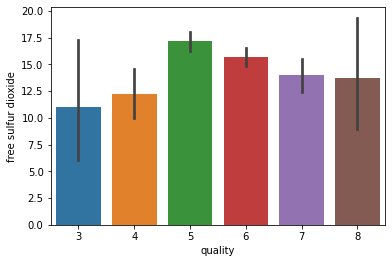

In [16]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

In [17]:
#there is a relation between free sulfur dioxide and quality but its not linear
#high variance in quality = 3, 8

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

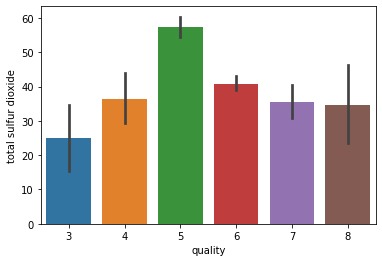

In [18]:

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

In [19]:
#there is a relation between free sulfur dioxide and quality but its not linear
#high variance in quality = 3, 4, 8

<AxesSubplot:xlabel='quality', ylabel='density'>

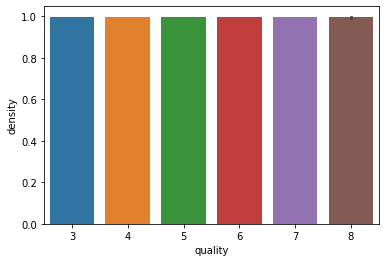

In [20]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = wine)

In [21]:
wine[["density"]].describe()

,density
count,1359.000000
mean,0.996709
std,0.001869
min,0.990070
25%,0.995600
50%,0.996700
75%,0.997820
max,1.003690


In [22]:
#density min is 0.99, so we define a new variable like (density-0.99) * 1000
wine["densityComperasion"] = (wine["density"]-0.99) * 1000
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,densityComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.8
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,8.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7.8


<AxesSubplot:xlabel='quality', ylabel='densityComperasion'>

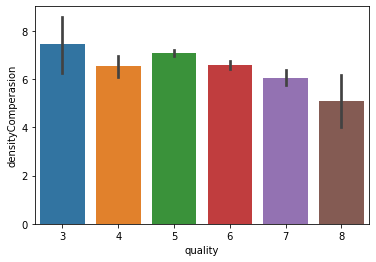

In [23]:
#new column created to comperasion densities
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'densityComperasion', data = wine)

In [24]:
#quality and densityComperasion have realtion, increasing densityComperasion can increase quality
#high variance in quality = 3, 8

<AxesSubplot:xlabel='quality', ylabel='pH'>

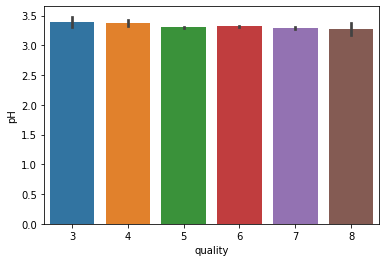

In [25]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pH', data = wine)

In [26]:
#lets define a new variable to comperasion ph better
wine[["pH"]].describe()

,pH
count,1359.000000
mean,3.309787
std,0.155036
min,2.740000
25%,3.210000
50%,3.310000
75%,3.400000
max,4.010000


In [27]:
#min is 2.74, so lets defien a new variable like (ph-2.74)*10
wine["pHComperasion"] = (wine["pH"] - 2.74) * 10
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7.8,7.7


<AxesSubplot:xlabel='quality', ylabel='pHComperasion'>

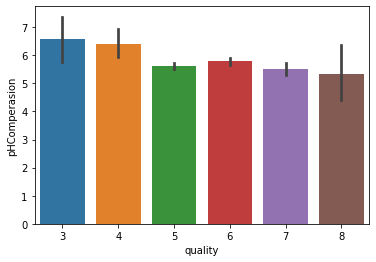

In [28]:
#new column created to comperasion densities
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pHComperasion', data = wine)

In [29]:
#it seems there is a little downward pattern by pHComperasion
#high variance in quality = 3, 8

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

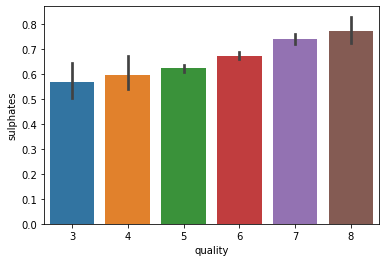

In [30]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

In [31]:
#by increasing sulphates we see a increasing pattern in quality
#high variance in quality = 3, 4, 8

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

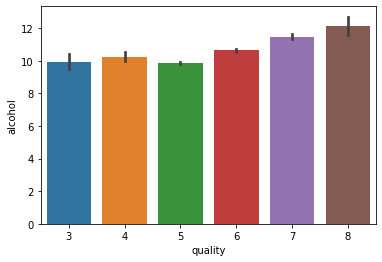

In [32]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [33]:
#by increasing alcohol we see a increasing pattern in quality

In [34]:
#drop density and pH rows and preparing for training
wine1=wine.drop(['density','pH'], axis='columns')
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,5,7.8,7.7


In [35]:
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine1['quality'] = pd.cut(wine1['quality'], bins = bins, labels = group_names)
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,bad,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,bad,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,bad,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,good,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,bad,7.8,7.7


In [36]:
label_quality = LabelEncoder()
wine1['quality'] = label_quality.fit_transform(wine1['quality'])
wine1['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

In [37]:
X = wine1.drop('quality', axis = 1)
y = wine1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
#score = logisticRegr.score(X_test, y_test)
pred_logres = logisticRegr.predict(X_test)
#print(score)
print(classification_report(y_test, pred_logres))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       125
           1       0.82      0.73      0.78       147

    accuracy                           0.77       272
   macro avg       0.77      0.78      0.77       272
weighted avg       0.78      0.77      0.77       272



In [40]:
print(confusion_matrix(y_test, pred_logres))

[[102  23]
 [ 39 108]]


In [41]:
logisticRegr.coef_

array([[ 0.12069344, -0.54611523, -0.23081918,  0.02296478, -0.16390642,
         0.1990265 , -0.55436383,  0.46712431,  0.97899666,  0.01542101,
        -0.07238047]])

In [42]:
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
#X = data[['Gender', 'Height', 'Weight']] 
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature         VIF
0          fixed acidity  182.128549
1       volatile acidity   16.439427
2            citric acid    8.866208
3         residual sugar    7.141456
4              chlorides    5.961549
5    free sulfur dioxide    6.469125
6   total sulfur dioxide    6.133908
7              sulphates   23.312328
8                alcohol  192.541000
9     densityComperasion   81.566470
10         pHComperasion   46.300526


In [43]:
scores = cross_val_score(logisticRegr, X, y, cv=10)
scores.mean()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7196350762527233

In [44]:
#f_value, p_value = f_classif(X, y)

In [45]:
#f_classif1 = F_classif()

In [46]:
#logregression.get_params().keys()

In [47]:

#parameters = {'kernel':('poly', '3')}
#logregression = LogisticRegression()
#logregression.get_params()
#grid = GridSearchCV(logregression, parameters, cv=10, scoring='accuracy')
#grid.fit(X, y)
#clf.fit(X_train, y_train)

In [48]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
pred_lda = LDA.predict(X_test)
print(classification_report(y_test, pred_lda))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       125
           1       0.82      0.70      0.75       147

    accuracy                           0.75       272
   macro avg       0.76      0.76      0.75       272
weighted avg       0.76      0.75      0.75       272



In [49]:
print(confusion_matrix(y_test, pred_lda))

[[102  23]
 [ 44 103]]


In [50]:
#qda = QuadraticDiscriminantAnalysis()
#qda.fit(X_train, y_train)
#pred_qda = qda.predict(X_test)
#print(classification_report(y_test, pred_qda))

In [51]:
#print(confusion_matrix(y_test, pred_qda))

In [52]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
pred_knn = neigh.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71       125
           1       0.80      0.56      0.66       147

    accuracy                           0.68       272
   macro avg       0.71      0.69      0.68       272
weighted avg       0.71      0.68      0.68       272



In [53]:
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,0,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,0,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,1,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,0,7.8,7.7


In [54]:
#lets improve our models, start with logistic regression
#checking logistic regression model coefficient

logisticRegr.coef_

array([[ 0.12069344, -0.54611523, -0.23081918,  0.02296478, -0.16390642,
         0.1990265 , -0.55436383,  0.46712431,  0.97899666,  0.01542101,
        -0.07238047]])

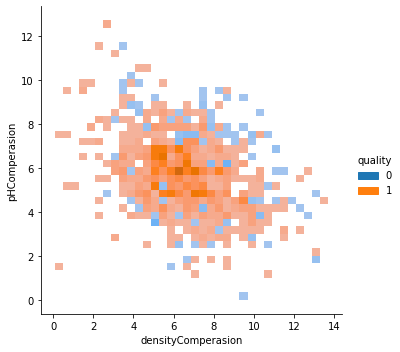

In [55]:
#pHComperasion and densityComperasion have low coefficients
#we can check relations between this 2 feature and quality in 1 plot
sns.displot(data=wine1, x="densityComperasion",y ="pHComperasion", hue="quality")

In [56]:
#it seems we can draw a circle with x=7 and y=6 center, in circle higher chance of quality = 1
#so we define a new variable, like z = (x-7)^2 + (y-6)^2, linear relation between z and x, z and y can show themselves
#in coefficients of x and y, so we just need to describe 2 new varible like x^2 and y^2
wine2 = wine1.copy()
wine2["extfeature1"] = wine2["densityComperasion"]**2
wine2["extfeature2"] = wine2["pHComperasion"]**2
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,densityComperasion,pHComperasion,extfeature1,extfeature2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0,7.8,7.7,60.84,59.29
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,0,6.8,4.6,46.24,21.16
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,0,7.0,5.2,49.00,27.04
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,1,8.0,4.2,64.00,17.64
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,0,7.8,7.7,60.84,59.29


In [57]:
#lets create a new model and check its score
X2 = wine2.drop('quality', axis = 1)
y2 = wine2['quality']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 9)
X2_train = sc.fit_transform(X2_train)
X2_test = sc.fit_transform(X2_test)

logisticRegr2 = LogisticRegression()
logisticRegr2.fit(X2_train, y2_train)
pred_logres2 = logisticRegr2.predict(X2_test)

print(classification_report(y2_test, pred_logres2))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       125
           1       0.82      0.73      0.77       147

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.77      0.77      0.77       272



In [58]:
logisticRegr2.coef_

array([[ 0.11133931, -0.53625026, -0.22112778,  0.00496541, -0.16190572,
         0.19605032, -0.55704087,  0.47814232,  0.96856092, -0.24829401,
         0.18104271,  0.26180162, -0.26265573]])

In [59]:
print(confusion_matrix(y2_test, pred_logres2))

[[102  23]
 [ 40 107]]


In [60]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   sulphates             1359 non-null   float64
 8   alcohol               1359 non-null   float64
 9   quality               1359 non-null   int64  
 10  densityComperasion    1359 non-null   float64
 11  pHComperasion         1359 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


In [61]:
#our model accuriacy increased, so we can add some other features, then choose p best of them
#start with adding x^2 of features
wine3=wine1.copy()
wine3["fixed acidity^2"]=wine1["fixed acidity"]**2
wine3["volatile acidity^2"]=wine1["volatile acidity"]**2
wine3["citric acid^2"]=wine1["citric acid"]**2
wine3["residual sugar^2"]=wine1["residual sugar"]**2
wine3["chlorides^2"]=wine1["chlorides"]**2
wine3["free sulfur dioxide^2"]=wine1["free sulfur dioxide"]**2
wine3["total sulfur dioxide^2"]=wine1["total sulfur dioxide"]**2
wine3["sulphates^2"]=wine1["sulphates"]**2
wine3["alcohol^2"]=wine1["alcohol"]**2
wine3["densityComperasion^2"]=wine1["densityComperasion"]**2
wine3["pHComperasion^2"]=wine1["pHComperasion"]**2

In [62]:
#lets create a new model and check its score
X3 = wine3.drop('quality', axis = 1)
y3 = wine3['quality']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 9)
X3_train = sc.fit_transform(X3_train)
X3_test = sc.fit_transform(X3_test)

logisticRegr3 = LogisticRegression()
logisticRegr3.fit(X3_train, y3_train)

pred_logres3 = logisticRegr3.predict(X3_test)

print(classification_report(y3_test, pred_logres3))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       125
           1       0.81      0.75      0.78       147

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.78      0.77      0.77       272



In [63]:
print(confusion_matrix(y3_test, pred_logres3))

[[100  25]
 [ 37 110]]


In [64]:
logisticRegr3.coef_

array([[ 0.63302689, -0.44761404, -0.35783966, -0.19064661, -0.09667268,
         0.80850061, -0.46067752,  1.85674318,  0.75972475, -0.40697383,
        -0.14579082, -0.60894617, -0.03552755,  0.15091881,  0.22893816,
        -0.06099419, -0.7065878 , -0.10679589, -1.41023731,  0.19384366,
         0.36274939, -0.05626397]])

In [65]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed acidity           1359 non-null   float64
 1   volatile acidity        1359 non-null   float64
 2   citric acid             1359 non-null   float64
 3   residual sugar          1359 non-null   float64
 4   chlorides               1359 non-null   float64
 5   free sulfur dioxide     1359 non-null   float64
 6   total sulfur dioxide    1359 non-null   float64
 7   sulphates               1359 non-null   float64
 8   alcohol                 1359 non-null   float64
 9   densityComperasion      1359 non-null   float64
 10  pHComperasion           1359 non-null   float64
 11  fixed acidity^2         1359 non-null   float64
 12  volatile acidity^2      1359 non-null   float64
 13  citric acid^2           1359 non-null   float64
 14  residual sugar^2        1359 non-null   

In [66]:
#now lets choose meaningful features with feature selection methods
feature_selector=SelectKBest(chi2,k=22)

X4 = feature_selector.fit_transform(X3, y3)
X4.shape


(1359, 22)

In [67]:
feature_selector.get_feature_names_out(input_features=None)

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'alcohol',
       'densityComperasion', 'pHComperasion', 'fixed acidity^2',
       'volatile acidity^2', 'citric acid^2', 'residual sugar^2',
       'chlorides^2', 'free sulfur dioxide^2', 'total sulfur dioxide^2',
       'sulphates^2', 'alcohol^2', 'densityComperasion^2',
       'pHComperasion^2'], dtype=object)

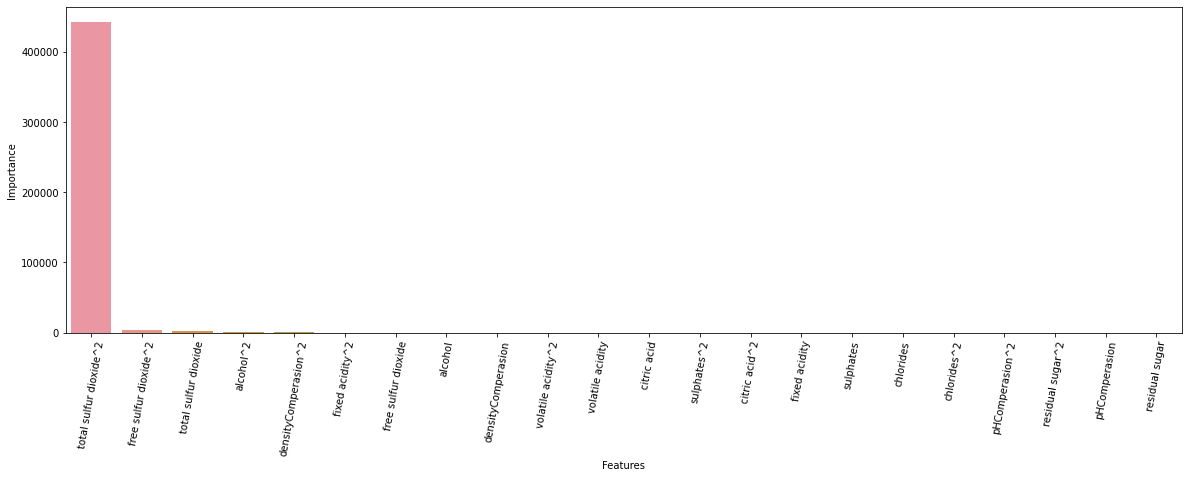

In [68]:
feature_cols=feature_selector.get_feature_names_out(input_features=None)
plot_df=pd.DataFrame({'Features':feature_cols,'Importance':feature_selector.scores_}).sort_values('Importance',ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(data=plot_df,x='Features',y='Importance');
plt.xticks(rotation=80);

In [69]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7.8,7.7


In [70]:
wine4=wine3.copy()
wine4["alcohol^3"]=wine4["alcohol"]**3
wine4["total sulfur dioxide^3"]=wine4["total sulfur dioxide"]**3
wine4["alcohol * total sulfur dioxide"]=wine4["alcohol"] * wine4["total sulfur dioxide"]

wine4["fixed acidity^3"]=wine4["fixed acidity"]**3
wine4["volatile acidity^3"]=wine4["volatile acidity"]**3
wine4["citric acid^3"]=wine4["citric acid"]**3
wine4["residual sugar^3"]=wine4["residual sugar"]**3
wine4["chlorides^3"]=wine4["chlorides"]**3
wine4["free sulfur dioxide^3"]=wine4["free sulfur dioxide"]**3
wine4["sulphates^3"]=wine4["sulphates"]**3
wine4["densityComperasion^3"]=wine4["densityComperasion"]**3
wine4["pHComperasion^3"]=wine4["pHComperasion"]**3


In [71]:
#lets create a new model and check its score
X4 = wine4.drop('quality', axis = 1)
y4 = wine4['quality']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 9)
X4_train = sc.fit_transform(X4_train)
X4_test = sc.fit_transform(X4_test)

logisticRegr4 = LogisticRegression()
logisticRegr4.fit(X4_train, y4_train)

pred_logres4 = logisticRegr4.predict(X4_test)

print(classification_report(y4_test, pred_logres4))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       125
           1       0.80      0.73      0.77       147

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



In [72]:
logisticRegr4.coef_

array([[ 5.94304270e-01, -4.67413146e-01, -2.65058108e-01,
        -7.63343217e-02, -3.40280604e-01,  6.55765311e-01,
        -4.97728395e-01,  1.45275805e+00,  7.82501705e-01,
        -4.11632164e-01, -7.87380476e-02,  1.53866544e-04,
         3.89687237e-02, -1.93100095e-01,  1.80264486e-02,
         6.38908904e-01, -7.57637738e-01, -1.73965696e+00,
        -3.54023349e-01,  3.27004683e-01,  1.74986632e-01,
        -2.28194715e-01, -3.20990443e-01,  8.27672082e-01,
         9.45636974e-01, -5.95593952e-01, -5.42609515e-02,
         2.78157665e-01,  9.45555895e-02, -5.35910118e-01,
         1.74433500e-01, -6.89936183e-01,  1.75106285e-01,
         1.07045046e-01]])

In [73]:
wine4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fixed acidity                   1359 non-null   float64
 1   volatile acidity                1359 non-null   float64
 2   citric acid                     1359 non-null   float64
 3   residual sugar                  1359 non-null   float64
 4   chlorides                       1359 non-null   float64
 5   free sulfur dioxide             1359 non-null   float64
 6   total sulfur dioxide            1359 non-null   float64
 7   sulphates                       1359 non-null   float64
 8   alcohol                         1359 non-null   float64
 9   quality                         1359 non-null   int64  
 10  densityComperasion              1359 non-null   float64
 11  pHComperasion                   1359 non-null   float64
 12  fixed acidity^2                 13

In [74]:
print(confusion_matrix(y4_test, pred_logres4))

[[ 98  27]
 [ 39 108]]


In [75]:
X5 = pd.DataFrame()
X5["alcohol"] = wine1["alcohol"]
y5=wine1["quality"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 9)
X5_train = sc.fit_transform(X5_train)
X5_test = sc.fit_transform(X5_test)

logisticRegr5 = LogisticRegression()
logisticRegr5.fit(X5_train, y5_train)

pred_logres5 = logisticRegr5.predict(X5_test)

print(classification_report(y5_test, pred_logres5))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       125
           1       0.78      0.69      0.74       147

    accuracy                           0.73       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.74      0.73      0.73       272



In [76]:
logisticRegr5.coef_

array([[1.11860302]])

In [77]:
X6 = pd.DataFrame()
X6["alcohol"] = wine1["alcohol"]
X6["alcohol^2"] = wine1["alcohol"]**2
y6=wine1["quality"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.2, random_state = 9)
X6_train = sc.fit_transform(X6_train)
X6_test = sc.fit_transform(X6_test)

logisticRegr6 = LogisticRegression()
logisticRegr6.fit(X6_train, y6_train)

pred_logres6 = logisticRegr6.predict(X6_test)

print(classification_report(y6_test, pred_logres6))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       125
           1       0.78      0.69      0.74       147

    accuracy                           0.73       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.74      0.73      0.73       272



In [78]:
logisticRegr6.coef_

array([[1.09886447, 0.02050402]])

In [79]:
poly = PolynomialFeatures(2)
poly.fit_transform(X5)
poly.get_feature_names_out(X5.columns)

array(['1', 'alcohol', 'alcohol^2'], dtype=object)

In [80]:
poly = PolynomialFeatures(2)
X6 = pd.DataFrame(poly.fit_transform(X), columns = poly.get_feature_names_out(X.columns))

X6.head()

,1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,...,sulphates^2,sulphates alcohol,sulphates densityComperasion,sulphates pHComperasion,alcohol^2,alcohol densityComperasion,alcohol pHComperasion,densityComperasion^2,densityComperasion pHComperasion,pHComperasion^2
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,...,0.3136,5.264,4.368,4.312,88.36,73.32,72.38,60.84,60.06,59.29
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,...,0.4624,6.664,4.624,3.128,96.04,66.64,45.08,46.24,31.28,21.16
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,...,0.4225,6.370,4.550,3.380,96.04,68.60,50.96,49.00,36.40,27.04
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,...,0.3364,5.684,4.640,2.436,96.04,78.40,41.16,64.00,33.60,17.64
4,1.0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,...,0.3136,5.264,4.368,4.312,88.36,73.32,72.38,60.84,60.06,59.29


In [81]:
y6=wine1["quality"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.2, random_state = 9)
X6_train = sc.fit_transform(X6_train)
X6_test = sc.fit_transform(X6_test)

logisticRegr6 = LogisticRegression()
logisticRegr6.fit(X6_train, y6_train)

pred_logres6 = logisticRegr6.predict(X6_test)

print(classification_report(y6_test, pred_logres6))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       125
           1       0.80      0.71      0.75       147

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [82]:
logisticRegr6.coef_.shape

(1, 78)

In [83]:
X6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   1                                         1359 non-null   float64
 1   fixed acidity                             1359 non-null   float64
 2   volatile acidity                          1359 non-null   float64
 3   citric acid                               1359 non-null   float64
 4   residual sugar                            1359 non-null   float64
 5   chlorides                                 1359 non-null   float64
 6   free sulfur dioxide                       1359 non-null   float64
 7   total sulfur dioxide                      1359 non-null   float64
 8   sulphates                                 1359 non-null   float64
 9   alcohol                                   1359 non-null   float64
 10  densityComperasion                  

In [84]:
X6.columns.shape

(78,)

In [85]:
best6 = pd.DataFrame()
best6.insert(0,"features",X6.columns)
best6.insert(1,"coef",abs(logisticRegr6.coef_.flatten()))
print(best6.sort_values(by='coef',ascending=False))

                            features      coef
68                       sulphates^2  1.045940
69                 sulphates alcohol  0.979055
15      fixed acidity residual sugar  0.907656
60       free sulfur dioxide alcohol  0.839195
43          residual sugar chlorides  0.804127
..                               ...       ...
76  densityComperasion pHComperasion  0.007060
42                  residual sugar^2  0.003405
39               citric acid alcohol  0.002508
46          residual sugar sulphates  0.002207
0                                  1  0.000000

[78 rows x 2 columns]


In [86]:
sfs_forward = SequentialFeatureSelector(
    logisticRegr6, n_features_to_select=5, direction="forward"
).fit(X6, y6)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [87]:
sfs_forward.get_feature_names_out()

array(['volatile acidity sulphates',
       'volatile acidity densityComperasion', 'chlorides alcohol',
       'sulphates^2', 'sulphates alcohol'], dtype=object)

In [88]:
X7 = pd.DataFrame()
X8 = sfs_forward.transform(X6)
X7 = pd.DataFrame(sfs_forward.transform(X6), columns = sfs_forward.get_feature_names_out())
#X8=X8.drop('1',axis='1')

In [89]:
y7 = y6.copy()
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.2, random_state = 9)
X7_train = sc.fit_transform(X7_train)
X7_test = sc.fit_transform(X7_test)

logisticRegr7 = LogisticRegression()
logisticRegr7.fit(X7_train, y7_train)

pred_logres7 = logisticRegr7.predict(X7_test)

print(classification_report(y7_test, pred_logres7))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       125
           1       0.81      0.69      0.75       147

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.76      0.75      0.75       272



In [90]:
print(confusion_matrix(y7_test, pred_logres7))

[[102  23]
 [ 46 101]]


In [91]:
scores = cross_val_score(logisticRegr7, X7, y7, cv=5)
scores.mean()

0.7461336010418927

In [92]:
scores2 = cross_val_score(logisticRegr2, X2, y2, cv=5)
scores2.mean()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7100906229650532

In [93]:
vif_data = pd.DataFrame()
vif_data["feature"] = X7.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X7.values, i)
                          for i in range(len(X7.columns))]
  
print(vif_data)

                               feature        VIF
0           volatile acidity sulphates  25.401374
1  volatile acidity densityComperasion  12.856046
2                    chlorides alcohol   5.780141
3                          sulphates^2   9.946207
4                    sulphates alcohol  15.325321
